# **DATA SET**


In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# **Steps to Classify Dogs and Cats**
1.Load the data

2.Analysis of  the dataset

3.Model training.

4.Model Evaluation.

5.Testing the model.

# Step 1 – Load the data:

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 72.0MB/s]
100% 1.06G/1.06G [00:11<00:00, 96.1MB/s]


# Unzip the data set


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import packages

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# Step 2- Analysis of the dataset:

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


0 for cats and 1 for dogs

In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Step 3- Model training

In [10]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Model Training**

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 108ms/step - loss: 1.1206 - accuracy: 0.5917 - val_loss: 0.6248 - val_accuracy: 0.6602
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5627 - accuracy: 0.7139 - val_loss: 0.5224 - val_accuracy: 0.7586
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4803 - accuracy: 0.7714 - val_loss: 0.4889 - val_accuracy: 0.7576
Epoch 4/10
625/625 [==============================] - 64s 103ms/step - loss: 0.4262 - accuracy: 0.8066 - val_loss: 0.5191 - val_accuracy: 0.7432
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3644 - accuracy: 0.8351 - val_loss: 0.4683 - val_accuracy: 0.7824
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2946 - accuracy: 0.8737 - val_loss: 0.4766 - val_accuracy: 0.7904
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2236 - accuracy: 0.9075 - val_loss: 0.6807 - val_ac

# Step 4- Model Evaluation.

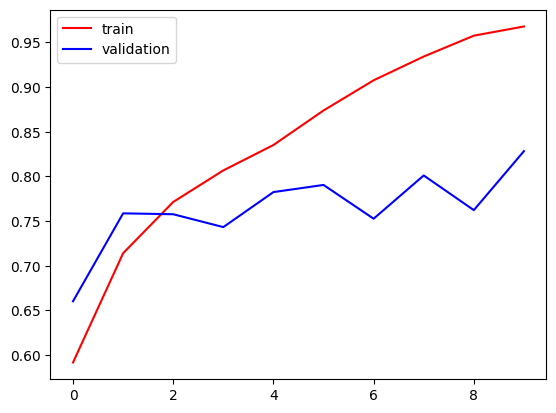

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

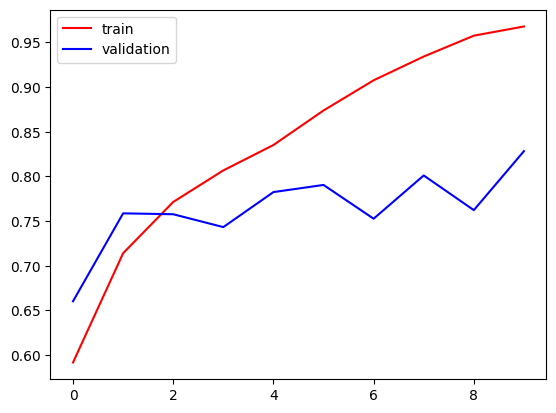

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

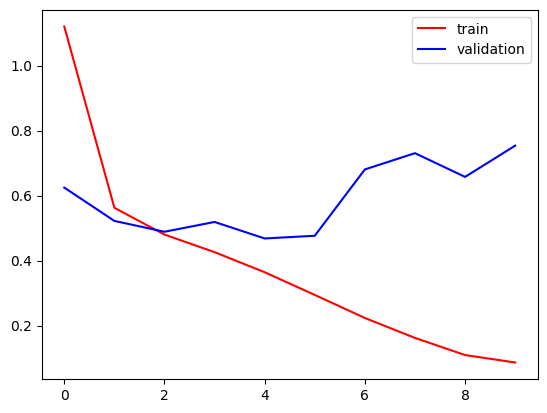

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

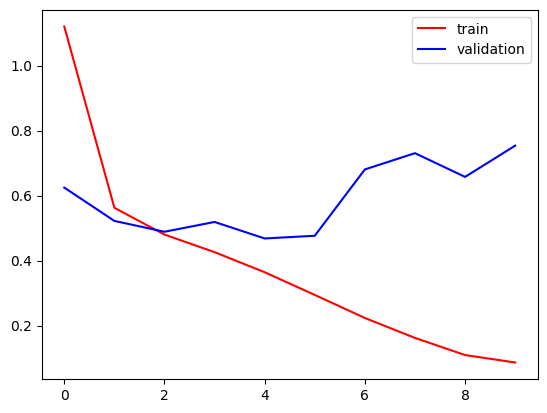

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Step 5- Testing the model.

In [19]:
import cv2

In [20]:
test_img = cv2.imread('/content/cat.jpeg')

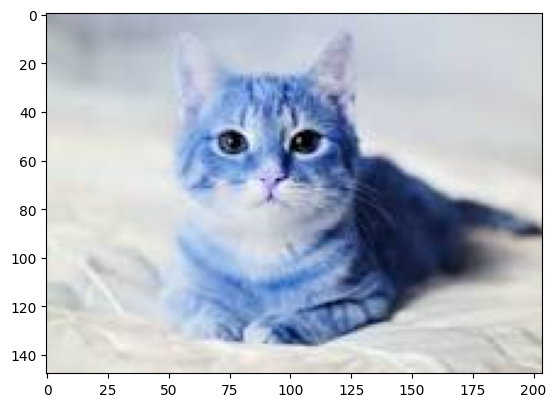

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(148, 204, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

In [24]:
test_input = test_img.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 404ms/step


array([[0.]], dtype=float32)

Array 0 means cat and Array 1 means dogs